# Эпизод 1

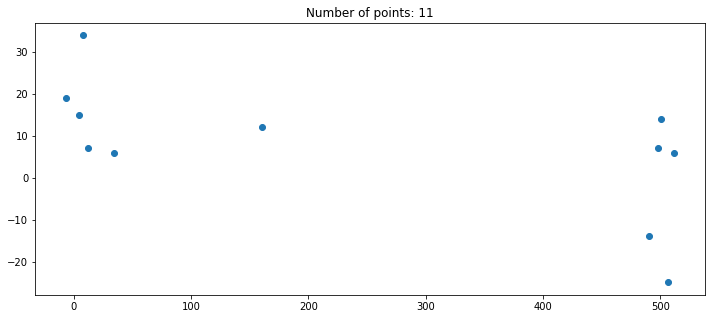

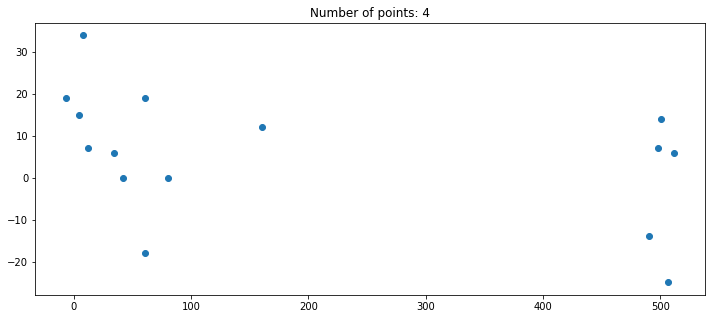

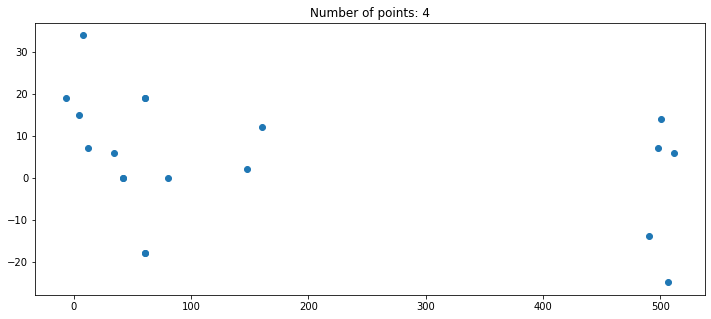

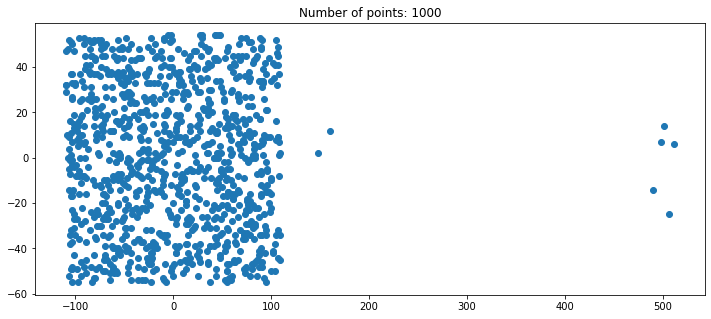

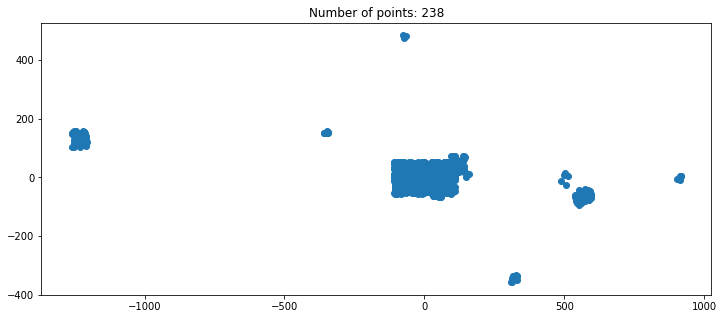

In [39]:
import matplotlib.pyplot as plt
x, y = [], []


for i in range(1, 6):
    with open('00{}.dat'.format(i)) as f:
        num = int(f.readline())
        line = f.readline().split()
        while len(line) == 2:        
            x.append(float(line[0]))
            y.append(float(line[1]))
            line = f.readline().split()
    fig, ax = plt.subplots(figsize = (12, 5))
    ax.scatter(x, y)
    ax.set_title('Number of points: {}'.format(num))
    plt.show()


# Эпизод 2

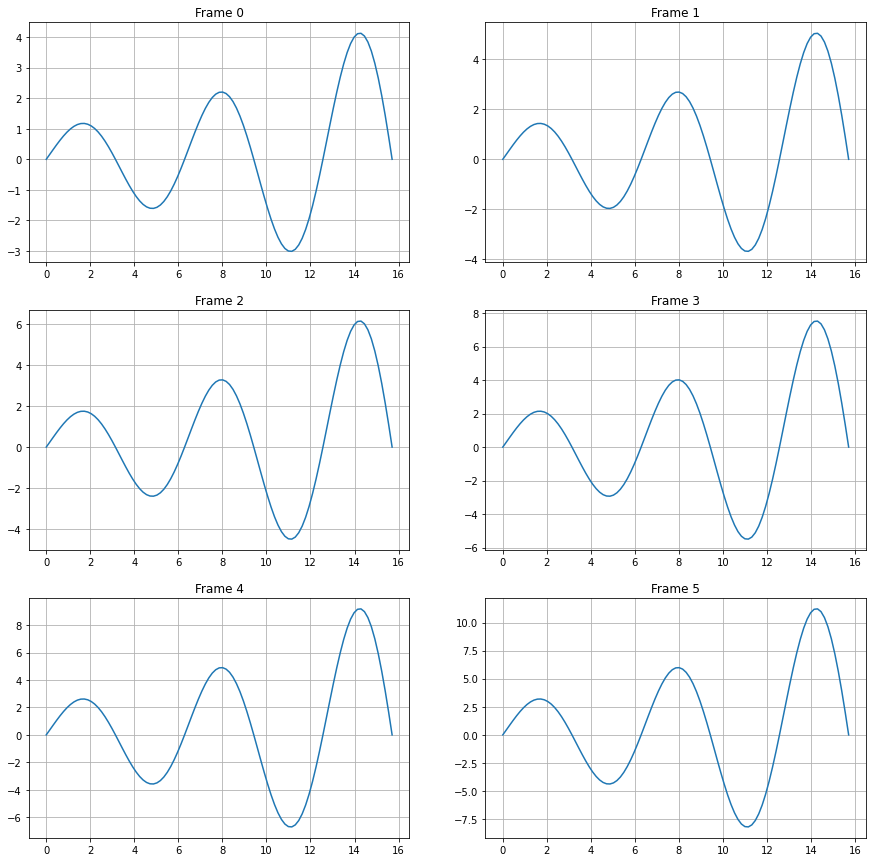

In [72]:
filename = 'frames.dat.txt'
data = {}
with open(filename) as f:
    i = 0
    for line in f:
        mass = []
        mass.append([float(elem) for elem in line.split()]) # Считаем x кадра
        line = f.readline()
        mass.append([float(elem) for elem in line.split()]) # Считаем y кадра
        data[i] = mass # В каждом кадре будет [[x], [y]]
        i += 1
fig, ax = plt.subplots(int(len(data) / 2), 2, figsize = (15, 15))
cnt = 0
for i in range(int(len(data) / 2)):
    for j in range(2):
        ax[i][j].plot(data[cnt][0], data[cnt][1])
        ax[i][j].set_title('Frame {}'.format(cnt))
        ax[i][j].grid()
        cnt += 1
plt.show()       

# Эпизод 3

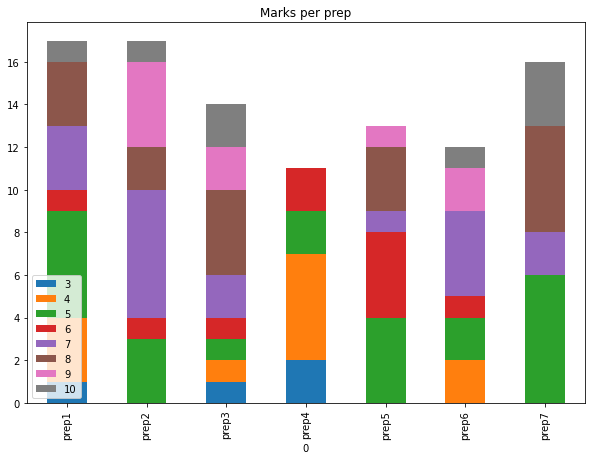

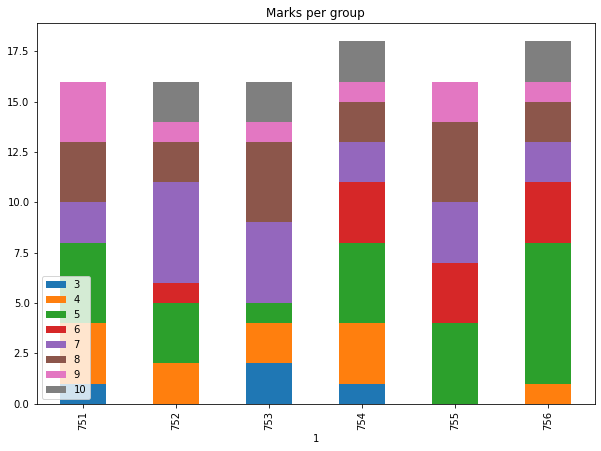

In [4]:
import csv
import pandas as pd


data = pd.read_csv("students.csv", sep=";", header=None)

df_preps = data.groupby([0, 2])
df_groups = data.groupby([1, 2])

df_preps = df_preps.size().unstack()
df_groups = df_groups.size().unstack()

df_preps.plot(kind="bar", stacked=True, title="Marks per prep", figsize = (10,7), xlabel=None, ylabel = None)
plt.legend(loc='lower left')
df_groups.plot(kind="bar", stacked=True, title="Marks per group", figsize = (10,7))
plt.legend(loc='lower left')

# Дополнительное задание

Будем считать, что самые халявные препы - это те, которые имеют большее количество положительных(отл, хор) оценок по сравнению с отрицательными(уд, неуд).  

In [175]:
df_preps

2,3,4,5,6,7,8,9,10
0,,,,,,,,
prep1,1.0,3.0,5.0,1.0,3.0,3.0,NaN,1.0
prep2,NaN,NaN,3.0,1.0,6.0,2.0,4.0,1.0
prep3,1.0,1.0,1.0,1.0,2.0,4.0,2.0,2.0
prep4,2.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN
prep5,NaN,NaN,4.0,4.0,1.0,3.0,1.0,NaN
prep6,NaN,2.0,2.0,1.0,4.0,NaN,2.0,1.0
prep7,NaN,NaN,6.0,NaN,2.0,5.0,NaN,3.0


Можно найти среднее по всем препам  
Найти среднее для каждого препа  
И по смещению среднего от всей массы сказать халявный он или нет

In [78]:
msm = []
for i in range(df_preps.shape[0]):
    print(df_preps.values[i])
    msm.append(np.nanmean(df_preps.values[i]))
print(np.mean(msm))

[ 1.  3.  5.  1.  3.  3. nan  1.]
[nan nan  3.  1.  6.  2.  4.  1.]
[1. 1. 1. 1. 2. 4. 2. 2.]
[ 2.  5.  2.  2. nan nan nan nan]
[nan nan  4.  4.  1.  3.  1. nan]
[nan  2.  2.  1.  4. nan  2.  1.]
[nan nan  6. nan  2.  5. nan  3.]
2.62312925170068


In [84]:
avgs = {df_preps.axes[0][i] :np.nanmean(df_preps.values[i]) for i in range(df_preps.shape[0])}
avg = sum(avgs.values())/df_preps.shape[0]
data = {
    'Халява': [],
    'Не халява' : []
}
for i, j in avgs.items():
    if j < avg:
        data['Не халява'].append(i)
    else:
        data['Халява'].append(i)
print(data)
res = pd.DataFrame.from_dict(data)
print(res)


{'Халява': ['prep2', 'prep4', 'prep7'], 'Не халява': ['prep1', 'prep3', 'prep5', 'prep6']}


ValueError: arrays must all be same length

In [83]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d
